binzrized lena


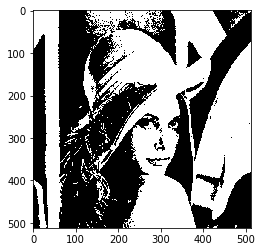

lena dilation


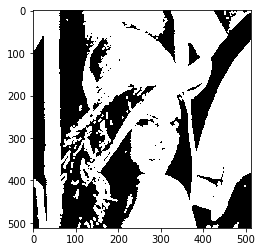

lena erosion


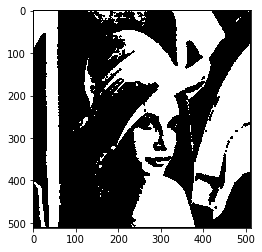

lena opening


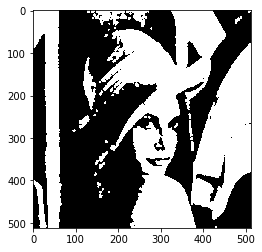

lena closing


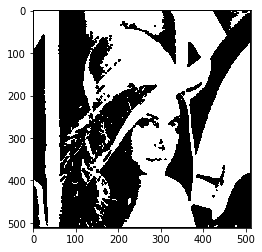

lena hit and miss


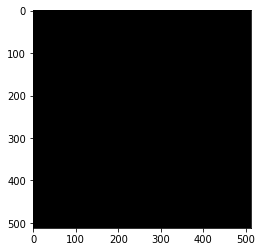

In [12]:
#!/usr/bin/env python
# coding: utf-8
# NTU CSIE, Computer Vision HW2, R08922024, Alfons Hwu

import cv2
import math, sys
import matplotlib.pyplot as plt
import numpy as np

####### IO ############
img = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)

kernel = [[-2, -1], [-2, 0], [-2, 1],
[-1, -2], [-1, -1], [-1, 0], [-1, 1], [-1, 2],
[0, -2],  [0, -1], [0, 0], [0, 1], [0, 2],
[1, -2],  [1, -1], [1, 0], [1, 1], [1, 2],
          [2, -1], [2, 0], [2, 1]]
####### binarize ######
def img_binarize(img_in):
    return (img_in > 0x7f) * 0xff

img_bin = img_binarize(img)
print('binzrized lena')
plt.imshow(img_bin, cmap = 'gray')
plt.show()

####### dilation #####
def dilation(a, b):
    ra, ca = a.shape # original image
    res = np.zeros(a.shape, dtype = 'uint8')
    
    for ai in range(ra):
        for aj in range(ca):
            if a[ai, aj] == 0xff:
                
                # assign original image position
                res[ai, aj] = 0xff
                for b_each in b:
                    bi, bj = b_each
                    if  ai + bi >= 0 and ai + bi < ra \
                    and aj + bj >= 0 and aj + bj < ca: 
                        # extend the value
                        res[ai + bi, aj + bj] = 0xff 
                        
    return res 

img_dilated = dilation(img_bin, kernel)
print('lena dilation')
plt.imshow(img_dilated, cmap = 'gray')
plt.savefig('lena_dialated', cmap = 'gray', dpi = 150)
cv2.imwrite('lena_dialated_cv.png', img_dilated)
plt.show()

####### erosion #######
def erosion(a, b):
    ra, ca = a.shape # original image
    res = np.zeros(a.shape, dtype = 'uint8')
    
    for ai in range(ra):
        for aj in range(ca):
            if a[ai, aj] == 0xff:
                
                # assign original image position erode the pixel or not
                res[ai, aj] = 0xff 
                ok = 1 
                for b_each in b:
                    bi, bj = b_each
                    if ai + bi >= ra or aj + bj >= ca \
                    or ai + bi <  0  or aj + bj <  0 \
                    or a[ai + bi, aj + bj] != 0xFF:
                        ok = 0
                        break
                        
                if ok == 0:
                    # erode the pixel
                    res[ai, aj] = 0
    
    return res 

img_eroded = erosion(img_bin, kernel)
print('lena erosion')
plt.imshow(img_eroded, cmap = 'gray')
plt.savefig('lena_erodeed_new', cmap = 'gray', dpi = 150)
cv2.imwrite('lena_erodeed_new_cv.png', img_eroded)
plt.show()

####### opening #######
def opening(a, b):
    return dilation(erosion(a, b), b)

img_opened = opening(img_bin, kernel)
print('lena opening')
plt.imshow(img_opened, cmap = 'gray')
plt.savefig('lena_opened', cmap = 'gray', dpi = 150)
cv2.imwrite('lena_opened_cv.png', img_opened)
plt.show()

####### closing #######
def closing(a, b):
    return erosion(dilation(a, b), b)

img_closed = closing(img_bin, kernel)
print('lena closing')
plt.imshow(img_closed, cmap = 'gray')
plt.savefig('lena_closed', cmap = 'gray', dpi = 150)
cv2.imwrite('lena_closed_cv.png', img_closed)
plt.show()

##### hit & miss ######
def hit_and_miss(a, j, k):
    a_c = -a + 0xff
    
    a_j = erosion(a, j)
    a_k = erosion(a_c, k)
    
    # intersect with add up and div 2 to see whether still 255
    return (((a_j + a_k) // 2) == 0xff) * 0xff 

kernel_j = [[0, -1], [0, 0], [1, 0]]
kernel_k = [[-1, 0], [-1, 1], [0, 1]]
img_hm = hit_and_miss(img_bin, kernel_j, kernel_k)
print('lena hit and miss')
plt.imshow(img_hm, cmap = 'gray')
plt.savefig('lena_hm', cmap = 'gray', dpi = 150)
cv2.imwrite('lena_hm_cv.png', img_hm)
plt.show()